# AlexNet auf Datensatz CIFAR-10

## AlexNet

__AlexNet__ wurde 2012 von __Alex Krizhevsky__, __Ilya Sutskever__ und __Geoffrey Hinton__ entwickelt entwickelt und war ein damals bahnbrechendes tiefes neuronales Netzwerk. Es revolutionierte das Gebiet des Deep Learning, insbesondere im Bereich der Bildverarbeitung, und gewann den ImageNet Large Scale Visual Recognition Challenge (ILSVRC) Wettbewerb 2012 mit einer beeindruckenden Fehlerrate von nur 15,3 %, während der zweitplatzierte Algorithmus eine Fehlerrate von etwa 26 % hatte.

### Laden des Modells

Mit Hilfe von PyTorch können wir das trainierte AlexNet direkt laden:

In [11]:
from torchvision import models

model = models.alexnet(pretrained = True)

## Die Architektur

AlexNet setzt mehrere Schichten von Convolutional Networks zur Vorverarbeitung der Bilddaten ein, und danach drei Schichten vollständig verbundener Netzwerke:

* Fünf __Convolutional Layers__ (Conv)
* Drei __Fully Connected Layers__ (FC)

#### Zentrale Merkmale von AlexNet

* __ReLU-Aktivierung__: Statt der damals üblichen Sigmoid- oder Tanh-Funktionen verwendete AlexNet die ReLU-Funktion (Rectified Linear Unit), was das Training deutlich beschleunigte.
* __Dropout__: Um Overfitting zu vermeiden, wurde erstmals das Dropout-Verfahren eingeführt.
* __Data Augmentation__: Techniken wie Spiegelung und Verschiebung von Bildern verbesserten die Generalisierung.
* __GPU-Nutzung__: Das Netzwerk wurde auf zwei GPUs parallel trainiert, was eine effizientere Berechnung ermöglichte.

In [16]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Wir verschieben das Modell in die GPU, falls vorhanden:

In [44]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device);

### Laden des CIFAR-10-Datensatzes

In [19]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [31]:
root = './data'

batch_size = 10000
test_data = datasets.CIFAR10(root=root,train=False,download=True,transform=ToTensor())
data, targets, classes = test_data.data, test_data.targets, test_data.classes

frog


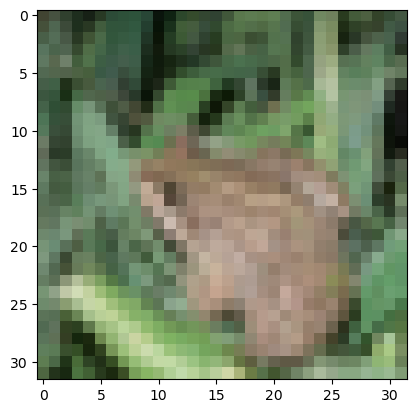

In [50]:
import matplotlib.pyplot as plt

nr = 4
image, target = data[nr], classes[targets[nr]]

print(target)
plt.imshow(image);

In [51]:
from PIL import Image
from torchvision import transforms
import torch.nn.functional as F

print(image.shape)
pixels = 32
r, g, b = image[0], image[1], image[2]
rgb = np.stack([r, g, b], axis=-1)
image2 = Image.fromarray(rgb, 'RGB')

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(image2)
input_batch = input_tensor.unsqueeze(0)
input_batch = input_batch.to(device)


with torch.no_grad():
    output = model(input_batch)

probabilities = F.softmax(output[0], dim=0)

import numpy as np

with open('imagenet_classes.txt','r') as f:
    categories = [line.strip()  for line in f]
    

label = np.argmax(probabilities.to('cpu')).item()

print(categories[label])

(32, 32, 3)
black grouse


### Anmerkungen

[^1]: Ilya Sutskever ist einer der Gründer von __OpenAI__


### Links

https://pytorch.org/hub/pytorch_vision_alexnet/